<a href="https://colab.research.google.com/github/jean-pierre-gergie/AlertingAPI/blob/main/notebook4_1_jp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow.keras as keras
import pandas as pd
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

# Load in our data from CSV files
train_df = pd.read_csv("https://raw.githubusercontent.com/harmanani/AAI612/main/Week4/asl_data/sign_mnist_train.csv")
valid_df = pd.read_csv("https://raw.githubusercontent.com/harmanani/AAI612/main/Week4/asl_data/sign_mnist_valid.csv")

# Separate out our target values
y_train = train_df['label']
y_valid = valid_df['label']
del train_df['label']
del valid_df['label']

# Separate out our image vectors
x_train = train_df.values
x_valid = valid_df.values

# Turn our scalar targets into binary categories
num_classes = 24
y_train = keras.utils.to_categorical(y_train, num_classes)
y_valid = keras.utils.to_categorical(y_valid, num_classes)

# Normalize our image data
x_train = x_train / 255
x_valid = x_valid / 255

In [2]:
x_train.shape, x_valid.shape

((27455, 784), (7172, 784))

In [3]:
x_train = x_train.reshape(-1,28,28,1)
x_valid = x_valid.reshape(-1,28,28,1)

In [4]:
x_train.shape

(27455, 28, 28, 1)

In [5]:
x_valid.shape

(7172, 28, 28, 1)

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv2D,
    MaxPool2D,
    Flatten,
    Dropout,
    BatchNormalization,
    GlobalAveragePooling2D
)

In [7]:

def get_model_v1(name):
  model = Sequential(name=name)
  model.add(Conv2D(75, (3, 3), strides=1, padding="same", activation="relu", input_shape=(28, 28, 1)))
  model.add(BatchNormalization())
  model.add(MaxPool2D((2, 2), strides=2, padding="same"))
  model.add(Conv2D(50, (3, 3), strides=1, padding="same", activation="relu"))
  model.add(Dropout(0.2))
  model.add(BatchNormalization())
  model.add(MaxPool2D((2, 2), strides=2, padding="same"))
  model.add(Conv2D(25, (3, 3), strides=1, padding="same", activation="relu"))
  model.add(BatchNormalization())
  model.add(MaxPool2D((2, 2), strides=2, padding="same"))
  model.add(Flatten())
  model.add(Dense(units=512, activation="relu"))
  model.add(Dropout(0.3))
  model.add(Dense(units=num_classes, activation="softmax"))
  model.compile(loss="categorical_crossentropy", metrics=["accuracy"])
  model.summary()
  return model

def get_model_v2(name):
    model = Sequential(name=name)
    model.add(Conv2D(75, (3, 3), strides=1, padding="same", activation="relu", input_shape=(28, 28, 1)))
    model.add(BatchNormalization())
    model.add(MaxPool2D((2, 2), strides=2, padding="same"))
    model.add(Conv2D(50, (3, 3), strides=1, padding="same", activation="relu"))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(MaxPool2D((2, 2), strides=2, padding="same"))
    model.add(Conv2D(25, (3, 3), strides=1, padding="same", activation="relu"))
    model.add(BatchNormalization())
    model.add(MaxPool2D((2, 2), strides=2, padding="same"))
    model.add(GlobalAveragePooling2D())
    model.add(Dense(units=512, activation="relu"))
    model.add(Dropout(0.3))
    model.add(Dense(units=num_classes, activation="softmax"))
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"])
    model.summary()
    return model

In [8]:
from tensorflow.keras.callbacks import EarlyStopping
import time

def train_model(model, epochs, x_train, y_train, x_valid, y_valid):
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    start_time = time.time()

    history = model.fit(
        x_train, y_train,
        epochs=epochs,
        verbose=1,
        validation_data=(x_valid, y_valid),
        callbacks=[early_stopping]
    )

    end_time = time.time()
    training_time = end_time - start_time
    return model, history, training_time

In [9]:
from sklearn.metrics import confusion_matrix, f1_score
import numpy as np
import matplotlib.pyplot as plt

In [10]:
def evaluate(model, epochs, history, X_valid, y_valid):
    y_pred = model.predict(X_valid)
    y_valid_labels = np.argmax(y_valid, axis=1)
    y_pred_labels = np.argmax(y_pred, axis=1)

    cm = confusion_matrix(y_valid_labels, y_pred_labels)

    accuracy = np.trace(cm) / np.sum(cm)
    print("Our accuracy is {:.2f}%".format(accuracy * 100))


    actual_epochs = len(history.history['loss'])
    chart_x = range(1, actual_epochs + 1)
    plt.plot(chart_x, history.history['loss'], 'r-', label='training error')
    plt.plot(chart_x, history.history['val_loss'], 'b-', label='validation error')
    plt.xlabel('Training Epochs')
    plt.ylabel('Error')
    plt.legend()
    plt.show()

    # F1 Score
    f1 = f1_score(y_valid_labels, y_pred_labels, average='macro')
    print("F1 Score:", f1)

    return f1

In [11]:
EPOCHS = 1
res={}

In [12]:
models={
    'modle_v1_fc':get_model_v1("modle_v1_fc"),
    'modle_v2_ga':get_model_v2("modle_v1_fc")
}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "modle_v1_fc"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 75)          │             750 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 28, 28, 75)          │             300 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 75)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 50)          │          33,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 50)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 14, 14, 50)          │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 50)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 25)            │          11,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 7, 7, 25)            │             100 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 25)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         205,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 24)                  │          12,312 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 264,049 (1.01 MB)

 Trainable params: 263,749 (1.01 MB)

 Non-trainable params: 300 (1.17 KB)

Model: "modle_v1_fc"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 75)          │             750 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 28, 28, 75)          │             300 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 75)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 14, 14, 50)          │          33,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 14, 14, 50)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 14, 14, 50)          │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 50)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 7, 7, 25)            │          11,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 7, 7, 25)            │             100 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 25)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 25)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │          13,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 24)                  │          12,312 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 72,049 (281.44 KB)

 Trainable params: 71,749 (280.27 KB)

 Non-trainable params: 300 (1.17 KB)

modle_v1_fc
858/858 ━━━━━━━━━━━━━━━━━━━━ 103s 116ms/step - accuracy: 0.7611 - loss: 0.8043 - val_accuracy: 0.7158 - val_loss: 1.1683
225/225 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step
Our accuracy is 71.58%


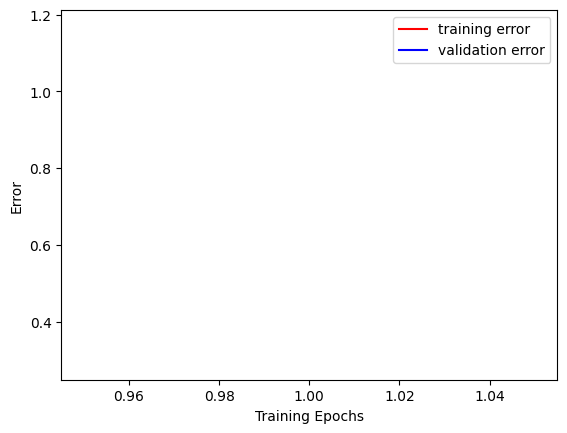

F1 Score: 0.7262931180204028
modle_v1_fc
858/858 ━━━━━━━━━━━━━━━━━━━━ 101s 115ms/step - accuracy: 0.5541 - loss: 1.4661 - val_accuracy: 0.5598 - val_loss: 1.6534
225/225 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step
Our accuracy is 55.98%


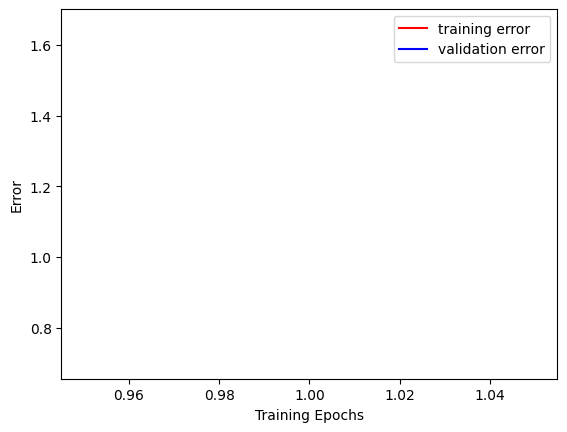

F1 Score: 0.5150531075746643


In [13]:
for _,m in models.items() :
  print(m.name)
  model , history, time_taken = train_model(m,  EPOCHS, x_train=x_train, y_train=y_train, x_valid=x_valid, y_valid=y_valid)
  f1_score_ = evaluate(model,  EPOCHS, history, x_valid, y_valid)
  res[m.name] = {"f1_score_" : f1_score_ , "time_taken" : time_taken}

In [14]:
import pickle
from google.colab import files

# Save your results dictionary
with open('results.pkl', 'wb') as f:
    pickle.dump(res, f)

# Download the pickle file
files.download('results.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [16]:
import os
from google.colab import files

# Get the notebook name dynamically
notebook_name = [f for f in os.listdir('/content') if f.endswith('.ipynb')][0]

# Download the notebook
files.download(f'/content/{notebook_name}')

IndexError: list index out of range